In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

In [2]:
def read(input_file):
    with open(input_file) as f:
        data = f.read().splitlines()
        data = [float(i) for i in data]
    return data

In [3]:
def scatter_plot(list1, list2, list1_label, list2_label, title):
    x = np.asarray(list1).reshape(-1, 1)
    y = np.asarray(list2).reshape(-1, 1)
    plt.scatter(x, y)
    plt.xlabel(list1_label)
    plt.ylabel(list2_label)
    plt.title(title)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size
    plt.show()
    
    
def scatter_plot_log(list1, list2, list1_label, list2_label, title):
    x = np.asarray(np.log(list1)).reshape(-1, 1)
    y = np.asarray(np.log(list2)).reshape(-1, 1)
    plt.scatter(x, y)
    plt.xlabel(list1_label)
    plt.ylabel(list2_label)
    plt.title(title)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size
    plt.show()

In [4]:
def linear_regression(X_train, y_train, X_test, y_test, xlabel, ylabel, title):

    X_train_np = np.asarray(X_train).reshape(-1, 1)
    X_test_np = np.asarray(X_test).reshape(-1, 1)

    y_train_np = np.asarray(y_train).reshape(-1, 1)
    y_test_np = np.asarray(y_test).reshape(-1, 1)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train_np, y_train_np)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test_np)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    
    # The coefficients
    print('Intercept: \n', regr.intercept_)
    
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test_np, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test_np, y_pred))

    # Plot outputs
    plt.scatter(X_test_np, y_test,  color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)

#     plt.xticks(())
#     plt.yticks(())
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size

    plt.show()
    

In [66]:
class FuncFit:
    def __init__(self):
        self.b0 = None
        self.b1 = None
    
    def _func(self, x, b0, b1):
        return b0 + (b1 * np.power(x, 1/4))
    
    def fit(self, xdata, ydata):
        x_ = np.asarray(xdata)
        y_ = np.asarray(ydata)

        popt, pcov = curve_fit(self._func, x_, y_)
        self.b0 = popt[0]
        self.b1 = popt[1]

        
    def predict(self, xdata, ydata):
        x_ = np.asarray(xdata)
        y_ = np.asarray(ydata)

        plt.scatter(x_, y_)
        
        zipped = list(zip(x_, self._func(x_, self.b0, self.b1)))
        zipped.sort()
        a,b = zip(*zipped)

        plt.plot(a, b, 'r-',
                 label='fit: b0=%5.3f, b1=%5.3f' % tuple(popt))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()
        
    
    def evaluate(self, ydata, ypred):
        pass
        
        

In [67]:
# Reading Data 

# Wiki data
bc_wiki = read("data_output/wiki_output/bc_ece_output.norm")
bc_wiki2 = read("data_output2/wiki_output/bc_ece_output.norm")

bs_wiki = read("data_output/wiki_output/bs_ece_output.norm")
bs_wiki2 = read("data_output2/wiki_output/bs_ece_output.norm")

gz1_wiki = read("data_output/wiki_output/gz1_ece_output.norm")
gz1_wiki2 = read("data_output2/wiki_output/gz1_ece_output.norm")

gz6_wiki = read("data_output/wiki_output/gz6_ece_output.norm")
gz6_wiki2 = read("data_output2/wiki_output/gz6_ece_output.norm")

lz4_wiki = read("data_output/wiki_output/lz4_ece_output.norm")
lz4_wiki2 = read("data_output2/wiki_output/lz4_ece_output.norm")

xz_wiki = read("data_output/wiki_output/xz_ece_output.norm")
xz_wiki2 = read("data_output2/wiki_output/xz_ece_output.norm")

avg_mean_wiki = read("data_output/wiki_output/avg_mean_output_raw.norm")
avg_mean_wiki2 = read("data_output2/wiki_output/avg_mean_output_raw.norm")

shannon_wiki = read("data_output/wiki_output/shannon_output_raw.norm")
shannon_wiki2 = read("data_output2/wiki_output/shannon_output_raw.norm")

heuristic_wiki = read("data_output/wiki_output/heuristic_output_raw.norm")
heuristic_wiki2 = read("data_output2/wiki_output/heuristic_output_raw.norm")

# Facebook Data
bc_fb = read("data_output/fb_output/bc_ece_output.norm")
bc_fb2 = read("data_output2/fb_output/bc_ece_output.norm")

bs_fb = read("data_output/fb_output/bs_ece_output.norm")
bs_fb2 = read("data_output2/fb_output/bs_ece_output.norm")

gz1_fb = read("data_output/fb_output/gz1_ece_output.norm")
gz1_fb2 = read("data_output2/fb_output/gz1_ece_output.norm")

gz6_fb = read("data_output/fb_output/gz6_ece_output.norm")
gz6_fb2 = read("data_output2/fb_output/gz6_ece_output.norm")

lz4_fb = read("data_output/fb_output/lz4_ece_output.norm")
lz4_fb2 = read("data_output2/fb_output/lz4_ece_output.norm")

xz_fb = read("data_output/fb_output/xz_ece_output.norm")
xz_fb2 = read("data_output2/fb_output/xz_ece_output.norm")

avg_mean_fb = read("data_output/fb_output/avg_mean_output_raw.norm")
avg_mean_fb2 = read("data_output2/fb_output/avg_mean_output_raw.norm")

shannon_fb = read("data_output/fb_output/shannon_output_raw.norm")
shannon_fb2 = read("data_output2/fb_output/shannon_output_raw.norm")

heuristic_fb = read("data_output/fb_output/heuristic_output_raw.norm")
heuristic_fb2 = read("data_output2/fb_output/heuristic_output_raw.norm")


# Youtube Data
bc = read("data_output/yt_output/bc_ece_output.norm")
bc2 = read("data_output2/yt_output/bc_ece_output.norm")

bs = read("data_output/yt_output/bs_ece_output.norm")
bs2 = read("data_output2/yt_output/bs_ece_output.norm")

gz1 = read("data_output/yt_output/gz1_ece_output.norm")
gz12 = read("data_output2/yt_output/gz1_ece_output.norm")

gz6 = read("data_output/yt_output/gz6_ece_output.norm")
gz62 = read("data_output2/yt_output/gz6_ece_output.norm")

lz4 = read("data_output/yt_output/lz4_ece_output.norm")
lz42 = read("data_output2/yt_output/lz4_ece_output.norm")

xz = read("data_output/yt_output/xz_ece_output.norm")
xz2 = read("data_output2/yt_output/xz_ece_output.norm")

avg_mean = read("data_output/yt_output/avg_mean_output_raw.norm")
avg_mean2 = read("data_output2/yt_output/avg_mean_output_raw.norm")

shannon = read("data_output/yt_output/shannon_output_raw.norm")
shannon2 = read("data_output2/yt_output/shannon_output_raw.norm")

heuristic = read("data_output/yt_output/heuristic_output_raw.norm")
heuristic2 = read("data_output2/yt_output/heuristic_output_raw.norm")


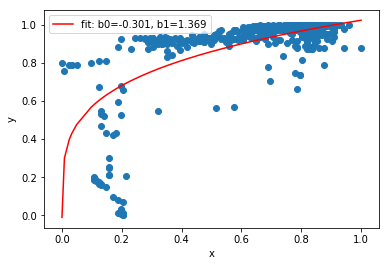

In [72]:

_bc_wiki = []
_gz1_wiki = []

for x in range(len(bc_wiki)):
    if bc_wiki[x] != 0.:
        _bc_wiki.append(bc_wiki[x])
        _gz1_wiki.append(gz1_wiki[x])
        
f = FuncFit()
f.fit(bc_wiki2, gz1_wiki2)
f.predict(bc_wiki, gz1_wiki)


# Scatter Plots

#### For Wiki

#scatter_plot_log(bc_wiki, gz1_wiki, "Log(ByteCounting)", "Log(Gzip 1)", "Output of Log(Bytecounting) and log(GZIP) 1 for Wikipedia Data")
#scatter_plot(bs_wiki, gz1_wiki, "Byte Standard Deviation", "Gzip 1", "Output of Byte Stdev and GZIP 1 for Wikipedia Data")
#scatter_plot(bc_wiki, gz6_wiki, "ByteCounting", "Gzip 6", "Output of Bytecounting and GZIP 6 for Wikipedia Data")
#scatter_plot(bs_wiki, gz6_wiki, "Byte Standard Deviation", "Gzip 6", "Output of Byte Stdev and GZIP 6 for Wikipedia Data")
#scatter_plot(bc_wiki, lz4_wiki, "ByteCounting", "LZ4", "Output of Bytecounting and LZ4 for Wikipedia Data")
#scatter_plot(bs_wiki, lz4_wiki, "Byte Standard Deviation", "LZ4", "Output of Byte Stdev and LZ4 for Wikipedia Data")
#scatter_plot(bc_wiki, xz_wiki, "ByteCounting", "XZ", "Output of Bytecounting and XZ for Wikipedia Data")
#scatter_plot(bs_wiki, xz_wiki, "Byte Standard Deviation", "XZ", "Output of Byte Standard Deviation and XZ for Wikipedia Data")
#scatter_plot(avg_mean_wiki, gz1_wiki, "AVG Mean Entropy", "Gzip 1", "Output of AVG Mean Entropy and GZIP 1 for Wiki")
#scatter_plot(avg_mean_wiki, gz6_wiki, "AVG Mean Entropy", "Gzip 6", "Output of AVG Mean Entropy and GZIP 6 for Wiki")
#scatter_plot(avg_mean_wiki, lz4_wiki, "AVG Mean Entropy", "LZ4", "Output of AVG Mean Entropy and LZ4 for Wiki")
#scatter_plot(avg_mean_wiki, xz_wiki, "AVG Mean Entropy", "XZ", "Output of AVG Mean Entropy and XZ for Wiki")
#scatter_plot(shannon_wiki, gz1_wiki, "Shannon Entropy", "Gzip 1", "Output of Shannon Entropy and GZIP 1 for Wiki")
#scatter_plot(shannon_wiki, gz6_wiki, "Shannon Entropy", "Gzip 6", "Output of Shannon Entropy and GZIP 6 for Wiki")
#scatter_plot(shannon_wiki, lz4_wiki, "Shannon Entropy", "LZ 4", "Output of Shannon Entropy and LZ 4 for Wiki")
#scatter_plot(shannon_wiki, xz_wiki, "Shannon Entropy", "XZ", "Output of Shannon Entropy and XZ for Wiki")
#scatter_plot(heuristic_wiki, gz1_wiki, "Heuristic Entropy", "Gzip 1", "Output of Heuristic Entropy and GZIP 1 for Wiki")
#scatter_plot(heuristic_wiki, gz6_wiki, "Heuristic Entropy", "Gzip 6", "Output of Heuristic Entropy and GZIP 6 for Wiki")
#scatter_plot(heuristic_wiki, lz4_wiki, "Heuristic Entropy", "LZ4", "Output of Heuristic Entropy and LZ4 for Wiki")
#scatter_plot(heuristic_wiki, xz_wiki, "Heuristic Entropy", "XZ", "Output of Heuristic Entropy and XZ for Wiki")

### For Facebook

# scatter_plot(bc_fb, gz1_fb, "ByteCounting", "Gzip 1", "Output of Bytecounting and GZIP 1 for Facebook Data")
# scatter_plot(bs_fb, gz1_fb, "Byte Standard Deviation", "Gzip 1", "Output of Byte Stdev and GZIP 1 for Facebook Data")
# scatter_plot(bc_fb, gz6_fb, "ByteCounting", "Gzip 6", "Output of Bytecounting and GZIP 6 for Facebook Data")
# scatter_plot(bs_fb, gz6_fb, "Byte Standard Deviation", "Gzip 6", "Output of Byte Stdev and GZIP 6 for Facebook Data")
# scatter_plot(bc_fb, lz4_fb, "ByteCounting", "LZ4", "Output of Bytecounting and LZ4 for Facebook Data")
# scatter_plot(bs_fb, lz4_fb, "Byte Standard Deviation", "LZ4", "Output of Byte Stdev and LZ4 for Facebook Data")
# scatter_plot(bc_fb, xz_fb, "ByteCounting", "XZ", "Output of Bytecounting and XZ for Facebook Data")
# scatter_plot(bs_fb, xz_fb, "Byte Standard Deviation", "XZ", "Output of Byte Standard Deviation and XZ for Facebook Data")


### For Youtube Data

# scatter_plot(bc, gz1, "ByteCounting", "Gzip 1", "Output of Bytecounting and GZIP 1 for Youtube Data")
# scatter_plot(bs, gz1, "Byte Standard Deviation", "Gzip 1", "Output of Byte Stdev and GZIP 1 for Youtube Data")
# scatter_plot(bc, gz6, "ByteCounting", "Gzip 6", "Output of Bytecounting and GZIP 6 for Youtube Data")
# scatter_plot(bs, gz6, "Byte Standard Deviation", "Gzip 6", "Output of Byte Stdev and GZIP 6 for Youtube Data")
# scatter_plot(bc, lz4, "ByteCounting", "LZ4", "Output of Bytecounting and LZ4 for Youtube Data")
# scatter_plot(bs, lz4, "Byte Standard Deviation", "LZ4", "Output of Byte Stdev and LZ4 for Youtube Data")
# scatter_plot(bc, xz, "ByteCounting", "XZ", "Output of Bytecounting and XZ for Youtube Data")
# scatter_plot(bs, xz, "Byte Standard Deviation", "XZ", "Output of Byte Standard Deviation and XZ for Youtube Data")



In [64]:
##################################### Byte Standard Deviation Regression Models ###############################

############ Wikipedia Data
### Training data and Testing data
# linear_regression(bs_wiki2, gz1_wiki2, bs_wiki, gz1_wiki, "Byte Standard Deviation", "Gzip 1", "Gzip1 Regression on Byte Standard Deviation")
# linear_regression(bs_wiki2, gz6_wiki2, bs_wiki, gz6_wiki, "Byte Standard Deviation", "Gzip 6", "Gzip6 Regression on Byte Standard Deviation")
# linear_regression(bs_wiki2, lz4_wiki2, bs_wiki, lz4_wiki, "Byte Standard Deviation", "LZ 4", "LZ4 Regression on Byte Standard Deviation")
# linear_regression(bs_wiki2, xz_wiki2, bs_wiki, xz_wiki, "Byte Standard Deviation", "XZ", "XZ Regression on Byte Standard Deviation")

### Training data only
#linear_regression(bs_wiki2, gz1_wiki2, bs_wiki2, gz1_wiki2, "Byte Standard Deviation", "Gzip 1", "Gzip1 Regression on Byte Standard Deviation")
#linear_regression(bs_wiki2, gz6_wiki2, bs_wiki2, gz6_wiki2, "Byte Standard Deviation", "Gzip 6", "Gzip6 Regression on Byte Standard Deviation")
#linear_regression(bs_wiki2, lz4_wiki2, bs_wiki2, lz4_wiki2, "Byte Standard Deviation", "LZ 4", "LZ4 Regression on Byte Standard Deviation")
#linear_regression(bs_wiki2, xz_wiki2, bs_wiki2, xz_wiki2, "Byte Standard Deviation", "XZ", "XZ Regression on Byte Standard Deviation")


### Testing data only
#linear_regression(bs_wiki, gz1_wiki, bs_wiki, gz1_wiki, "Byte Standard Deviation", "Gzip 1", "Gzip1 Regression on Byte Standard Deviation")
#linear_regression(bs_wiki, gz6_wiki, bs_wiki, gz6_wiki, "Byte Standard Deviation", "Gzip 6", "Gzip6 Regression on Byte Standard Deviation")
#linear_regression(bs_wiki, lz4_wiki, bs_wiki, lz4_wiki, "Byte Standard Deviation", "LZ 4", "LZ4 Regression on Byte Standard Deviation")
#linear_regression(bs_wiki, xz_wiki, bs_wiki, xz_wiki, "Byte Standard Deviation", "XZ", "XZ Regression on Byte Standard Deviation")



############ Facebook Data
### Training data and Testing data
#linear_regression(bs_fb2, gz1_fb2, bs_fb, gz1_fb, "Byte Standard Deviation", "Gzip 1", "Gzip1 Regression on Byte Standard Deviation")
#linear_regression(bs_fb2, gz6_fb2, bs_fb, gz6_fb, "Byte Standard Deviation", "Gzip 6", "Gzip6 Regression on Byte Standard Deviation")
#linear_regression(bs_fb2, lz4_fb2, bs_fb, lz4_fb, "Byte Standard Deviation", "LZ 4", "LZ4 Regression on Byte Standard Deviation")
#linear_regression(bs_fb2, xz_fb2, bs_fb, xz_fb, "Byte Standard Deviation", "XZ", "XZ Regression on Byte Standard Deviation")

### Training data only
#linear_regression(bs_fb2, gz1_fb2, bs_fb2, gz1_fb2, "Byte Standard Deviation", "Gzip 1", "Gzip1 Regression on Byte Standard Deviation")
#linear_regression(bs_fb2, gz6_fb2, bs_fb2, gz6_fb2, "Byte Standard Deviation", "Gzip 6", "Gzip6 Regression on Byte Standard Deviation")
#linear_regression(bs_fb2, lz4_fb2, bs_fb2, lz4_fb2, "Byte Standard Deviation", "LZ 4", "LZ4 Regression on Byte Standard Deviation")
#linear_regression(bs_fb2, xz_fb2, bs_fb2, xz_fb2, "Byte Standard Deviation", "XZ", "XZ Regression on Byte Standard Deviation")


### Testing data only
#linear_regression(bs_fb, gz1_fb, bs_fb, gz1_fb, "Byte Standard Deviation", "Gzip 1", "Gzip1 Regression on Byte Standard Deviation")
#linear_regression(bs_fb, gz6_fb, bs_fb, gz6_fb, "Byte Standard Deviation", "Gzip 6", "Gzip6 Regression on Byte Standard Deviation")
#linear_regression(bs_fb, lz4_fb, bs_fb, lz4_fb, "Byte Standard Deviation", "LZ 4", "LZ4 Regression on Byte Standard Deviation")
#linear_regression(bs_fb, xz_fb, bs_fb, xz_fb, "Byte Standard Deviation", "XZ", "XZ Regression on Byte Standard Deviation")


############ Youtube Data
### Training data and Testing data
#linear_regression(bs2, gz12, bs, gz1, "Byte Standard Deviation", "Gzip 1", "Gzip1 Regression on Byte Standard Deviation")
#linear_regression(bs2, gz62, bs, gz6, "Byte Standard Deviation", "Gzip 6", "Gzip6 Regression on Byte Standard Deviation")
#linear_regression(bs2, lz42, bs, lz4, "Byte Standard Deviation", "LZ 4", "LZ4 Regression on Byte Standard Deviation")
#linear_regression(bs2, xz2, bs, xz, "Byte Standard Deviation", "XZ", "XZ Regression on Byte Standard Deviation")

### Training data only
#linear_regression(bs2, gz12, bs2, gz12, "Byte Standard Deviation", "Gzip 1", "Gzip1 Regression on Byte Standard Deviation")
#linear_regression(bs2, gz62, bs2, gz62, "Byte Standard Deviation", "Gzip 6", "Gzip6 Regression on Byte Standard Deviation")
#linear_regression(bs2, lz42, bs2, lz42, "Byte Standard Deviation", "LZ 4", "LZ4 Regression on Byte Standard Deviation")
#linear_regression(bs2, xz2, bs2, xz2, "Byte Standard Deviation", "XZ", "XZ Regression on Byte Standard Deviation")


### Testing data only
#linear_regression(bs, gz1, bs, gz1, "Byte Standard Deviation", "Gzip 1", "Gzip1 Regression on Byte Standard Deviation")
#linear_regression(bs, gz6, bs, gz6, "Byte Standard Deviation", "Gzip 6", "Gzip6 Regression on Byte Standard Deviation")
#linear_regression(bs, lz4, bs, lz4, "Byte Standard Deviation", "LZ 4", "LZ4 Regression on Byte Standard Deviation")
#linear_regression(bs, xz, bs, xz, "Byte Standard Deviation", "XZ", "XZ Regression on Byte Standard Deviation")






In [65]:
##################################### Average Meaning Entropy Regression Models ###############################

_avg_mean_wiki2 = []
_gz1_wiki2 = []
_gz6_wiki2 = []
_lz4_wiki2 = []
_xz_wiki2 = []

for x in range(len(avg_mean_wiki2)):
    if avg_mean_wiki2[x] != 0:
        _avg_mean_wiki2.append(avg_mean_wiki2[x])
        _gz1_wiki2.append(gz1_wiki2[x])
        _gz6_wiki2.append(gz6_wiki2[x])
        _lz4_wiki2.append(lz4_wiki2[x])
        _xz_wiki2.append(xz_wiki2[x])

############ Wikipedia Data
### Training data and Testing data
#linear_regression(_avg_mean_wiki2, _gz1_wiki2, avg_mean_wiki, gz1_wiki, "Avg Mean Entropy", "Gzip 1", "Gzip1 Regression on Average Mean Entropy")
#linear_regression(_avg_mean_wiki2, _gz6_wiki2, avg_mean_wiki, gz6_wiki, "Avg Mean Entropy", "Gzip 6", "Gzip6 Regression on Average Mean Entropy")
#linear_regression(_avg_mean_wiki2, _lz4_wiki2, avg_mean_wiki, lz4_wiki, "Avg Mean Entropy", "LZ 4", "LZ4 Regression on Average Mean Entropy")
#linear_regression(_avg_mean_wiki2, _xz_wiki2, avg_mean_wiki, xz_wiki, "Avg Mean Entropy", "XZ", "XZ Regression on Average Mean Entropy")

### Training data only
#linear_regression(_avg_mean_wiki2, _gz1_wiki2, _avg_mean_wiki2, _gz1_wiki2, "Avg Mean Entropy", "Gzip 1", "Gzip1 Regression on Byte Standard Deviation")
#linear_regression(_avg_mean_wiki2, _gz6_wiki2, _avg_mean_wiki2, _gz6_wiki2, "Avg Mean Entropy", "Gzip 6", "Gzip6 Regression on Average Mean Entropy")
#linear_regression(_avg_mean_wiki2, _lz4_wiki2, _avg_mean_wiki2, _lz4_wiki2, "Avg Mean Entropy", "LZ 4", "LZ4 Regression on Average Mean Entropy")
#linear_regression(_avg_mean_wiki2, _xz_wiki2, _avg_mean_wiki2, _xz_wiki2, "Avg Mean Entropy", "XZ", "XZ Regression on Average Mean Entropy")


### Testing data only
#linear_regression(avg_mean_wiki, gz1_wiki, avg_mean_wiki, gz1_wiki, "Avg Mean Entropy", "Gzip 1", "Gzip1 Regression on Average Mean Entropy")
#linear_regression(avg_mean_wiki, gz6_wiki, avg_mean_wiki, gz6_wiki, "Avg Mean Entropy", "Gzip 6", "Gzip6 Regression on Average Mean Entropy")
#linear_regression(avg_mean_wiki, lz4_wiki, avg_mean_wiki, lz4_wiki, "Avg Mean Entropy", "LZ 4", "LZ4 Regression on Average Mean Entropy")
#linear_regression(avg_mean_wiki, xz_wiki, avg_mean_wiki, xz_wiki, "Avg Mean Entropy", "XZ", "XZ Regression on Average Mean Entropy")


_avg_mean_fb2 = []
_gz1_fb2 = []
_gz6_fb2 = []
_lz4_fb2 = []
_xz_fb2 = []

for x in range(len(avg_mean_fb2)):
    if avg_mean_fb2[x] != 0:
        _avg_mean_fb2.append(avg_mean_fb2[x])
        _gz1_fb2.append(gz1_fb2[x])
        _gz6_fb2.append(gz6_fb2[x])
        _lz4_fb2.append(lz4_fb2[x])
        _xz_fb2.append(xz_fb2[x])


_avg_mean_fb = []
_gz1_fb = []
_gz6_fb = []
_lz4_fb = []
_xz_fb = []

for x in range(len(avg_mean_fb)):
    if avg_mean_fb[x] != 0:
        _avg_mean_fb.append(avg_mean_fb[x])
        _gz1_fb.append(gz1_fb[x])
        _gz6_fb.append(gz6_fb[x])
        _lz4_fb.append(lz4_fb[x])
        _xz_fb.append(xz_fb[x])
        
############ Facebook Data
### Training data and Testing data
#linear_regression(_avg_mean_fb2, _gz1_fb2, _avg_mean_fb, _gz1_fb, "Avg Mean Entropy", "Gzip 1", "Gzip1 Regression on Average Mean Entropy")
#linear_regression(_avg_mean_fb2, _gz6_fb2, _avg_mean_fb, _gz6_fb, "Avg Mean Entropy", "Gzip 6", "Gzip6 Regression on Average Mean Entropy")
#linear_regression(_avg_mean_fb2, _lz4_fb2, _avg_mean_fb, _lz4_fb, "Avg Mean Entropy", "LZ 4", "LZ4 Regression on Average Mean Entropy")
#linear_regression(_avg_mean_fb2, _xz_fb2, _avg_mean_fb, _xz_fb, "Avg Mean Entropy", "XZ", "XZ Regression on Average Mean Entropy")

### Training data only
#linear_regression(_avg_mean_fb2, _gz1_fb2, _avg_mean_fb2, _gz1_fb2, "Avg Mean Entropy", "Gzip 1", "Gzip1 Regression on Average Mean Entropy")
#linear_regression(_avg_mean_fb2, _gz6_fb2, _avg_mean_fb2, _gz6_fb2, "Avg Mean Entropy", "Gzip 6", "Gzip6 Regression on Average Mean Entropy")
#linear_regression(_avg_mean_fb2, _lz4_fb2, _avg_mean_fb2, _lz4_fb2, "Avg Mean Entropy", "LZ 4", "LZ4 Regression on Average Mean Entropy")
#linear_regression(_avg_mean_fb2, _xz_fb2, _avg_mean_fb2, _xz_fb2, "Avg Mean Entropy", "XZ", "XZ Regression on Average Mean Entropy")


### Testing data only
#linear_regression(_avg_mean_fb, _gz1_fb, _avg_mean_fb, _gz1_fb, "Avg Mean Entropy", "Gzip 1", "Gzip1 Regression on Average Mean Entropy")
#linear_regression(_avg_mean_fb, _gz6_fb, _avg_mean_fb, _gz6_fb, "Avg Mean Entropy", "Gzip 6", "Gzip6 Regression on Average Mean Entropy")
#linear_regression(_avg_mean_fb, _lz4_fb, _avg_mean_fb, _lz4_fb, "Avg Mean Entropy", "LZ 4", "LZ4 Regression on Average Mean Entropy")
#linear_regression(_avg_mean_fb, _xz_fb, _avg_mean_fb, _xz_fb, "Avg Mean Entropy", "XZ", "XZ Regression on Average Mean Entropy")



#################################### Youtube Data
_avg_mean2 = []
_gz12 = []
_gz62 = []
_lz42 = []
_xz2 = []

for x in range(len(avg_mean2)):
    if avg_mean2[x] != 0:
        _avg_mean2.append(avg_mean2[x])
        _gz12.append(gz12[x])
        _gz62.append(gz62[x])
        _lz42.append(lz42[x])
        _xz2.append(xz2[x])


_avg_mean = []
_gz1 = []
_gz6 = []
_lz4 = []
_xz = []

for x in range(len(avg_mean)):
    if avg_mean[x] != 0:
        _avg_mean.append(avg_mean[x])
        _gz1.append(gz1[x])
        _gz6.append(gz6[x])
        _lz4.append(lz4[x])
        _xz.append(xz[x])

### Training data and Testing data
#linear_regression(_avg_mean2, _gz12, _avg_mean, _gz1, "Avg Mean Entropy", "Gzip 1", "Gzip1 Regression on Average Mean Entropy")
#linear_regression(_avg_mean2, _gz62, _avg_mean, _gz6, "Avg Mean Entropy", "Gzip 6", "Gzip6 Regression on Average Mean Entropy")
#linear_regression(_avg_mean2, _lz42, _avg_mean, _lz4, "Avg Mean Entropy", "LZ 4", "LZ4 Regression on Average Mean Entropy")
#linear_regression(_avg_mean2, _xz2, _avg_mean, _xz, "Avg Mean Entropy", "XZ", "XZ Regression on Average Mean Entropy")

### Training data only
#linear_regression(_avg_mean2, _gz12, _avg_mean2, _gz12, "Avg Mean Entropy", "Gzip 1", "Gzip1 Regression on Average Mean Entropy")
#linear_regression(_avg_mean2, _gz62, _avg_mean2, _gz62, "Avg Mean Entropy", "Gzip 6", "Gzip6 Regression on Average Mean Entropy")
#linear_regression(_avg_mean2, _lz42, _avg_mean2, _lz42, "Avg Mean Entropy", "LZ 4", "LZ4 Regression on Average Mean Entropy")
#linear_regression(_avg_mean2, _xz2, _avg_mean2, _xz2, "Avg Mean Entropy", "XZ", "XZ Regression on Average Mean Entropy")


### Testing data only
#linear_regression(_avg_mean, _gz1, _avg_mean, _gz1, "Avg Mean Entropy", "Gzip 1", "Gzip1 Regression on Average Mean Entropy")
#linear_regression(_avg_mean, _gz6, _avg_mean, _gz6, "Avg Mean Entropy", "Gzip 6", "Gzip6 Regression on Average Mean Entropy")
#linear_regression(_avg_mean, _lz4, _avg_mean, _lz4, "Avg Mean Entropy", "LZ 4", "LZ4 Regression on Average Mean Entropy")
#linear_regression(_avg_mean, _xz, _avg_mean, _xz, "Avg Mean Entropy", "XZ", "XZ Regression on Average Mean Entropy")







In [9]:
############################# Shannon Entropy #####################################################

############ Wikipedia Data

_shannon_wiki2 = []
_gz1_wiki2 = []
_gz6_wiki2 = []
_lz4_wiki2 = []
_xz_wiki2 = []

for x in range(len(shannon_wiki2)):
    if shannon_wiki2[x] != 0:
        _shannon_wiki2.append(shannon_wiki2[x])
        _gz1_wiki2.append(gz1_wiki2[x])
        _gz6_wiki2.append(gz6_wiki2[x])
        _lz4_wiki2.append(lz4_wiki2[x])
        _xz_wiki2.append(xz_wiki2[x])

### Training data and Testing data
#linear_regression(_shannon_wiki2, _gz1_wiki2, shannon_wiki, gz1_wiki, "Shannon Entropy", "Gzip 1", "Gzip1 Regression on Shannon Entropy")
#linear_regression(_shannon_wiki2, _gz6_wiki2, shannon_wiki, gz6_wiki, "Shannon Entropy", "Gzip 6", "Gzip6 Regression on Shannon Entropy")
#linear_regression(_shannon_wiki2, _lz4_wiki2, shannon_wiki, lz4_wiki, "Shannon Entropy", "LZ 4", "LZ4 Regression on Shannon Entropy")
#linear_regression(_shannon_wiki2, _xz_wiki2, shannon_wiki, xz_wiki, "Shannon Entropy", "XZ", "XZ Regression on Shannon Entropy")

### Training data only
#linear_regression(_shannon_wiki2, _gz1_wiki2, _shannon_wiki2, _gz1_wiki2, "Shannon Entropy", "Gzip 1", "Gzip1 Regression on Shannon Entropy")
#linear_regression(_shannon_wiki2, _gz6_wiki2, _shannon_wiki2, _gz6_wiki2, "Shannon Entropy", "Gzip 6", "Gzip6 Regression on Shannon Entropy")
#linear_regression(_shannon_wiki2, _lz4_wiki2, _shannon_wiki2, _lz4_wiki2, "Shannon Entropy", "LZ 4", "LZ4 Regression on Shannon Entropy")
#linear_regression(_shannon_wiki2, _xz_wiki2, _shannon_wiki2, _xz_wiki2, "Shannon Entropy", "XZ", "XZ Regression on Shannon Entropy")


### Testing data only
#linear_regression(shannon_wiki, gz1_wiki, shannon_wiki, gz1_wiki, "Shannon Entropy", "Gzip 1", "Gzip1 Regression on Shannon Entropy")
#linear_regression(shannon_wiki, gz6_wiki, shannon_wiki, gz6_wiki, "Shannon Entropy", "Gzip 6", "Gzip6 Regression on Shannon Entropy")
#linear_regression(shannon_wiki, lz4_wiki, shannon_wiki, lz4_wiki, "Shannon Entropy", "LZ 4", "LZ4 Regression on Shannon Entropy")
#linear_regression(shannon_wiki, xz_wiki, shannon_wiki, xz_wiki, "Shannon Entropy", "XZ", "XZ Regression on Shannon Entropy")



############ Facebook Data

_shannon_fb2 = []
_gz1_fb2 = []
_gz6_fb2 = []
_lz4_fb2 = []
_xz_fb2 = []

for x in range(len(shannon_fb2)):
    if shannon_fb2[x] != 0:
        _shannon_fb2.append(shannon_fb2[x])
        _gz1_fb2.append(gz1_fb2[x])
        _gz6_fb2.append(gz6_fb2[x])
        _lz4_fb2.append(lz4_fb2[x])
        _xz_fb2.append(xz_fb2[x])
        
_shannon_fb = []
_gz1_fb = []
_gz6_fb = []
_lz4_fb = []
_xz_fb = []

for x in range(len(shannon_fb)):
    if shannon_fb[x] != 0:
        _shannon_fb.append(shannon_fb[x])
        _gz1_fb.append(gz1_fb[x])
        _gz6_fb.append(gz6_fb[x])
        _lz4_fb.append(lz4_fb[x])
        _xz_fb.append(xz_fb[x])

### Training data and Testing data
#linear_regression(_shannon_fb2, _gz1_fb2, _shannon_fb, _gz1_fb, "Shannon Entropy", "Gzip 1", "Gzip1 Regression on Shannon Entropy")
#linear_regression(_shannon_fb2, _gz6_fb2, _shannon_fb, _gz6_fb, "Shannon Entropy", "Gzip 6", "Gzip6 Regression on Shannon Entropy")
#linear_regression(_shannon_fb2, _lz4_fb2, _shannon_fb, _lz4_fb, "Shannon Entropy", "LZ 4", "LZ4 Regression on Shannon Entropy")
#linear_regression(_shannon_fb2, _xz_fb2, _shannon_fb, _xz_fb, "Shannon Entropy", "XZ", "XZ Regression on Shannon Entropy")

### Training data only
#linear_regression(_shannon_fb2, _gz1_fb2, _shannon_fb2, _gz1_fb2, "Shannon Entropy", "Gzip 1", "Gzip1 Regression on Shannon Entropy")
#linear_regression(_shannon_fb2, _gz6_fb2, _shannon_fb2, _gz6_fb2, "Shannon Entropy", "Gzip 6", "Gzip6 Regression on Shannon Entropy")
#linear_regression(_shannon_fb2, _lz4_fb2, _shannon_fb2, _lz4_fb2, "Shannon Entropy", "LZ 4", "LZ4 Regression on Shannon Entropy")
#linear_regression(_shannon_fb2, _xz_fb2, _shannon_fb2, _xz_fb2, "Shannon Entropy", "XZ", "XZ Regression on Shannon Entropy")


### Testing data only
#linear_regression(_shannon_fb, _gz1_fb, _shannon_fb, _gz1_fb, "Shannon Entropy", "Gzip 1", "Gzip1 Regression on Shannon Entropy")
#linear_regression(_shannon_fb, _gz6_fb, _shannon_fb, _gz6_fb, "Shannon Entropy", "Gzip 6", "Gzip6 Regression on Shannon Entropy")
#linear_regression(_shannon_fb, _lz4_fb, _shannon_fb, _lz4_fb, "Shannon Entropy", "LZ 4", "LZ4 Regression on Shannon Entropy")
#linear_regression(_shannon_fb, _xz_fb, _shannon_fb, _xz_fb, "Shannon Entropy", "XZ", "XZ Regression on Shannon Entropy")




############ Youtube Data

_shannon2 = []
_gz12 = []
_gz62 = []
_lz42 = []
_xz2 = []

for x in range(len(shannon2)):
    if shannon2[x] != 0:
        _shannon2.append(shannon2[x])
        _gz12.append(gz12[x])
        _gz62.append(gz62[x])
        _lz42.append(lz42[x])
        _xz2.append(xz2[x])
        
_shannon = []
_gz1 = []
_gz6 = []
_lz4 = []
_xz = []

for x in range(len(shannon)):
    if shannon[x] != 0:
        _shannon.append(shannon[x])
        _gz1.append(gz1[x])
        _gz6.append(gz6[x])
        _lz4.append(lz4[x])
        _xz.append(xz[x])

### Training data and Testing data
#linear_regression(_shannon2, _gz12, _shannon, _gz1, "Shannon Entropy", "Gzip 1", "Gzip1 Regression on Shannon Entropy")
#linear_regression(_shannon2, _gz62, _shannon, _gz6, "Shannon Entropy", "Gzip 6", "Gzip6 Regression on Shannon Entropy")
#linear_regression(_shannon2, _lz42, _shannon, _lz4, "Shannon Entropy", "LZ 4", "LZ4 Regression on Shannon Entropy")
#linear_regression(_shannon2, _xz2, _shannon, _xz, "Shannon Entropy", "XZ", "XZ Regression on Shannon Entropy")

### Training data only
#linear_regression(_shannon2, _gz12, _shannon2, _gz12, "Shannon Entropy", "Gzip 1", "Gzip1 Regression on Shannon Entropy")
#linear_regression(_shannon2, _gz62, _shannon2, _gz62, "Shannon Entropy", "Gzip 6", "Gzip6 Regression on Shannon Entropy")
#linear_regression(_shannon2, _lz42, _shannon2, _lz42, "Shannon Entropy", "LZ 4", "LZ4 Regression on Shannon Entropy")
#linear_regression(_shannon2, _xz2, _shannon2, _xz2, "Shannon Entropy", "XZ", "XZ Regression on Shannon Entropy")


### Testing data only
#linear_regression(_shannon, _gz1, _shannon, _gz1, "Shannon Entropy", "Gzip 1", "Gzip1 Regression on Shannon Entropy")
#linear_regression(_shannon, _gz6, _shannon, _gz6, "Shannon Entropy", "Gzip 6", "Gzip6 Regression on Shannon Entropy")
#linear_regression(_shannon, _lz4, _shannon, _lz4, "Shannon Entropy", "LZ 4", "LZ4 Regression on Shannon Entropy")
#linear_regression(_shannon, _xz, _shannon, _xz, "Shannon Entropy", "XZ", "XZ Regression on Shannon Entropy")







In [10]:
# # Random Data
# bc = read("data_output/rn_output/bc_ece_output.norm")
# bs = read("data_output/rn_output/bs_ece_output.norm")
# gz1 = read("data_output/rn_output/gz1_ece_output.norm")
# gz6 = read("data_output/rn_output/gz6_ece_output.norm")
# lz4 = read("data_output/rn_output/lz4_ece_output.norm")
# xz = read("data_output/rn_output/xz_ece_output.norm")
# avg_mean = read("data_output/rn_output/avg_mean_output_raw.norm")
# shannon = read("data_output/rn_output/shannon_output_raw.norm")
# heuristic = read("data_output/rn_output/heuristic_output_raw.norm")

In [11]:
# scatter_plot(bc, gz1, "ByteCounting", "Gzip 1", "Output of Bytecounting and GZIP 1 for Random Data")
# scatter_plot(bs, gz1, "Byte Standard Deviation", "Gzip 1", "Output of Byte Stdev and GZIP 1 for Random Data")
# scatter_plot(bc, gz6, "ByteCounting", "Gzip 6", "Output of Bytecounting and GZIP 6 for Random Data")
# scatter_plot(bs, gz6, "Byte Standard Deviation", "Gzip 6", "Output of Byte Stdev and GZIP 6 for Random Data")
# scatter_plot(bc, lz4, "ByteCounting", "LZ4", "Output of Bytecounting and LZ4 for Random Data")
# scatter_plot(bs, lz4, "Byte Standard Deviation", "LZ4", "Output of Byte Stdev and LZ4 for Random Data")
# scatter_plot(bc, xz, "ByteCounting", "XZ", "Output of Bytecounting and XZ for Random Data")
# scatter_plot(bs, xz, "Byte Standard Deviation", "XZ", "Output of Byte Standard Deviation and XZ for Random Data")
# scatter_plot(avg_mean, gz1, "Avg Mean Entropy", "Gzip 1", "Output of Avg Mean and GZIP 1 for Random Data")
# scatter_plot(shannon, gz1, "Shannon Entropy", "Gzip 1", "Output of Shannon and GZIP 1 for Random Data")
#scatter_plot(heuristic, gz1, "Heuristic", "Gzip 1", "Output of Heuristic and GZIP 1 for Random Data")


In [12]:
# # Zero Data
# bc = read("data_output/ze_output/bc_ece_output.norm")
# bs = read("data_output/ze_output/bs_ece_output.norm")
# gz1 = read("data_output/ze_output/gz1_ece_output.norm")
# gz6 = read("data_output/ze_output/gz6_ece_output.norm")
# lz4 = read("data_output/ze_output/lz4_ece_output.norm")
# xz = read("data_output/ze_output/xz_ece_output.norm")
# avg_mean = read("data_output/ze_output/avg_mean_output_raw.norm")
# shannon = read("data_output/ze_output/shannon_output_raw.norm")
# heuristic = read("data_output/ze_output/heuristic_output_raw.norm")

In [13]:
# scatter_plot(bc, gz1, "ByteCounting", "Gzip 1", "Output of Bytecounting and GZIP 1 for Zero Data")
# scatter_plot(bs, gz1, "Byte Standard Deviation", "Gzip 1", "Output of Byte Stdev and GZIP 1 for Zero Data")
# scatter_plot(bc, gz6, "ByteCounting", "Gzip 6", "Output of Bytecounting and GZIP 6 for Zero Data")
# scatter_plot(bs, gz6, "Byte Standard Deviation", "Gzip 6", "Output of Byte Stdev and GZIP 6 for Zero Data")
# scatter_plot(bc, lz4, "ByteCounting", "LZ4", "Output of Bytecounting and LZ4 for Random Data")
# scatter_plot(bs, lz4, "Byte Standard Deviation", "LZ4", "Output of Byte Stdev and LZ4 for Zero Data")
# scatter_plot(bc, xz, "ByteCounting", "XZ", "Output of Bytecounting and XZ for Zero Data")
# scatter_plot(bs, xz, "Byte Standard Deviation", "XZ", "Output of Byte Standard Deviation and XZ for Zero Data")
# scatter_plot(avg_mean, gz1, "Average Meaning Entropy", "Gzip 1", "Output of Avg Mean and GZIP 1 for Zero Data")
# scatter_plot(shannon, gz1, "Shannon Entropy", "Gzip 1", "Output of Shannon and GZIP 1 for Zero Data")
#scatter_plot(heuristic, gz1, "Heuristic Entropy", "Gzip 1", "Output of Heuristic and GZIP 1 for Zero Data")

In [14]:
# def scatter_plot_log(list1, list2, list1_label, list2_label, title):
#     x = np.asarray(list1).reshape(-1, 1)
#     y = np.asarray(list2).reshape(-1, 1)
#     plt.scatter(x, y)
#     plt.xlabel(list1_label)
#     plt.ylabel(list2_label)
#     plt.title(title)
#     plt.yscale('log')
#     plt.xscale('log')
#     axes = plt.gca()
#     axes.set_xlim([0.1,1])
#     axes.set_ylim([0.1,1])
#     fig_size = plt.rcParams["figure.figsize"]
#     fig_size[0] = 12
#     fig_size[1] = 12
#     plt.rcParams["figure.figsize"] = fig_size
#     plt.show()